In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
t_a=12
t_c=6
l_a=14.5
l_c=18.4
air_t=pd.DataFrame(np.array([[20.99,25.3],[26.28,25.1],[28.95,25],[33.22,24.9],[43.25,24.7],[54.7,24.5]]), columns=["t","l"])
co_t=pd.DataFrame(np.array([[16.2,23.5],[19.8,23.4],[26.2,23.3],[33.7,23.2],[41.5,23.1],[58.7,23],[80,22.9]]), columns=["t","l"])
air=pd.read_excel("air.xlsx",sheet_name="air")
co=pd.read_excel("air.xlsx",sheet_name="co")

In [57]:
air_t["t"]=air_t.t-t_a
co_t["t"]=co_t.t-t_c
air_t["h"]=(air_t.l-l_a)*2
co_t["h"]=(co_t.l-l_c)*2
air["h1"]=(air.l1-l_a)*2
co["h1"]=(co.l1-l_c)*2
air["h2"]=(air.l2-l_a)*2
co["h2"]=(co.l2-l_c)*2
air["gamma"]=air.h1/(air.h1-air.h2)
co["gamma"]=co.h1/(co.h1-co.h2)
air["dg"]=np.sqrt((0.2/(air.h1-air.h2)/air.gamma)**2+(0.2*air.h2/(air.h1-air.h2)**2)**2)
co["dg"]=np.sqrt((0.2/(co.h1-co.h2)/co.gamma)**2+(0.2*co.h2/(co.h1-co.h2)**2)**2)

In [58]:
air=air.drop([2])

In [59]:
co=co.drop([4])

In [60]:
def mnk(x,y,free=1):
    k,a=np.polyfit(x, y, free)
    mu = np.mean(y) # средее
    mv = np.mean(x)
    mu2 = np.mean(y**2)
    mv2 = np.mean(x**2) # средний квадрат
    muv = np.mean (x*y) 
    sigma_k = np.sqrt(1/(x.shape[0]-2) * ( (mu2 - mu**2)/(mv2 - mv**2) - k**2 ) )
    print("Погрешность углового коэфицента")
    print(sigma_k)
    sigma_b = sigma_k * np.sqrt(mv2-mv**2)
    print("Погрешность свободного коэфицента")
    print(sigma_b)
    return (k,a)

In [76]:
ka,aa=mnk(air.iloc[:8].t, air.iloc[:8].gamma)
kc,ac=mnk(co.iloc[:10].t, co.iloc[:10].gamma)

Погрешность углового коэфицента
0.03737205175784662
Погрешность свободного коэфицента
0.011279535931144363
Погрешность углового коэфицента
0.0073842149549837545
Погрешность свободного коэфицента
0.004190826611123727


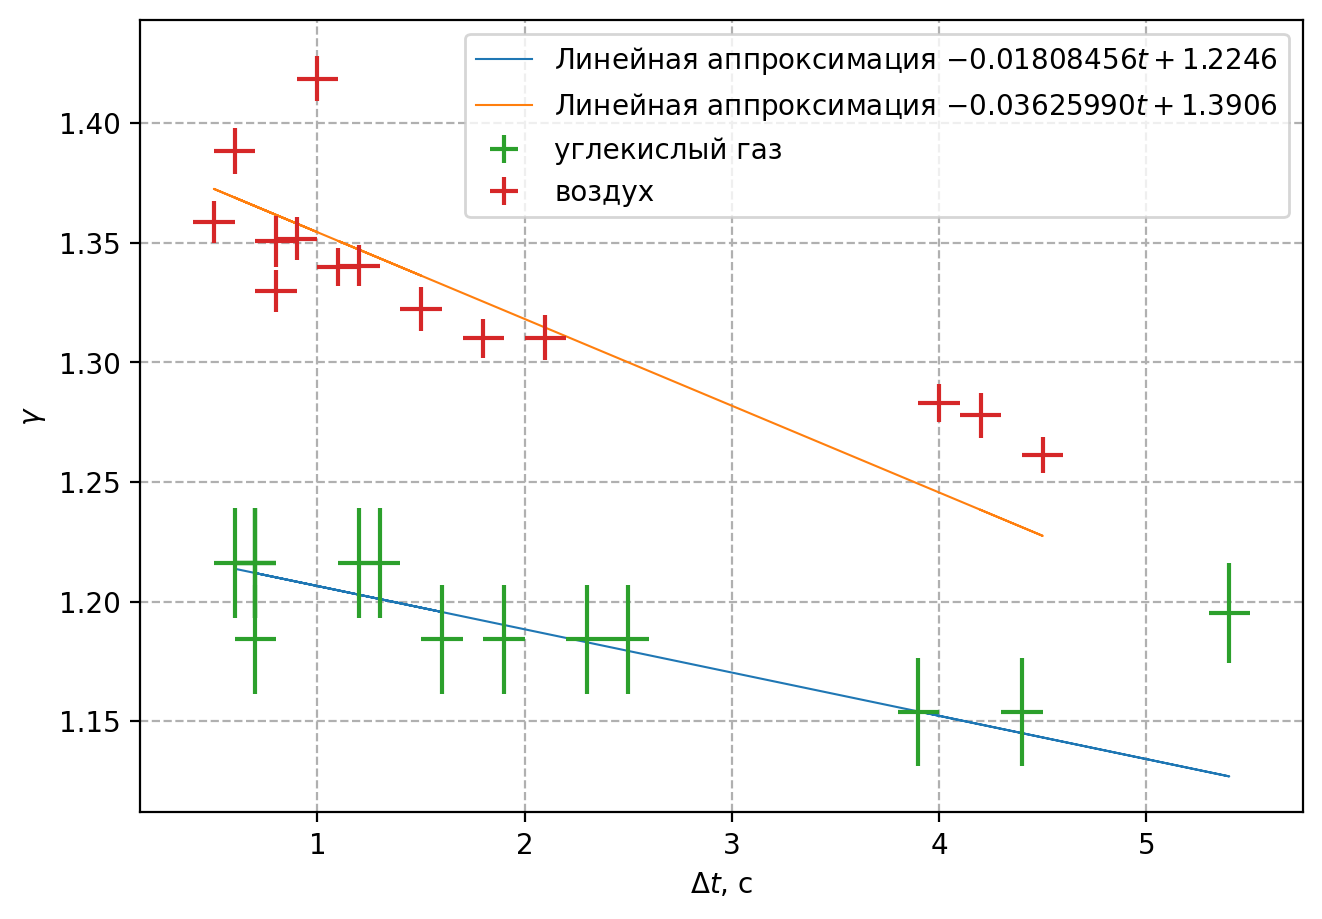

In [77]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$\gamma$") # подписи к осям
plt.xlabel("$\Delta t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.plot(co.t, kc * co.t + ac,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (kc, ac)) # аппроксимация
plt.plot(air.t, ka * air.t + aa,linewidth=1.5/2, label="Линейная аппроксимация $%.8f t + %.4f$" % (ka, aa)) # аппроксимация
plt.errorbar(co.t, co.gamma, xerr=0.1,yerr=co.dg, label="углекислый газ", ms=0.9/2, fmt='o')
plt.errorbar(air.t, air.gamma, xerr=0.1,yerr=air.dg, label="воздух", ms=0.9/2, fmt="o")
plt.legend() # легенда

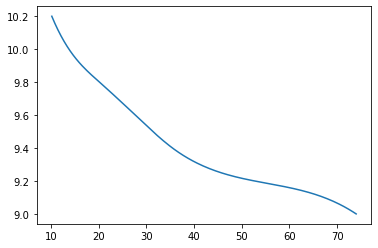

In [82]:
from scipy.interpolate import make_interp_spline, BSpline
spl = make_interp_spline (co_t.t, co_t.h, k= 3 )
xnew = np.linspace (co_t.t. min (), co_t.t. max (), 200 ) 
y_smooth = spl (xnew)
#create smooth line chart 
plt.plot (xnew, y_smooth)

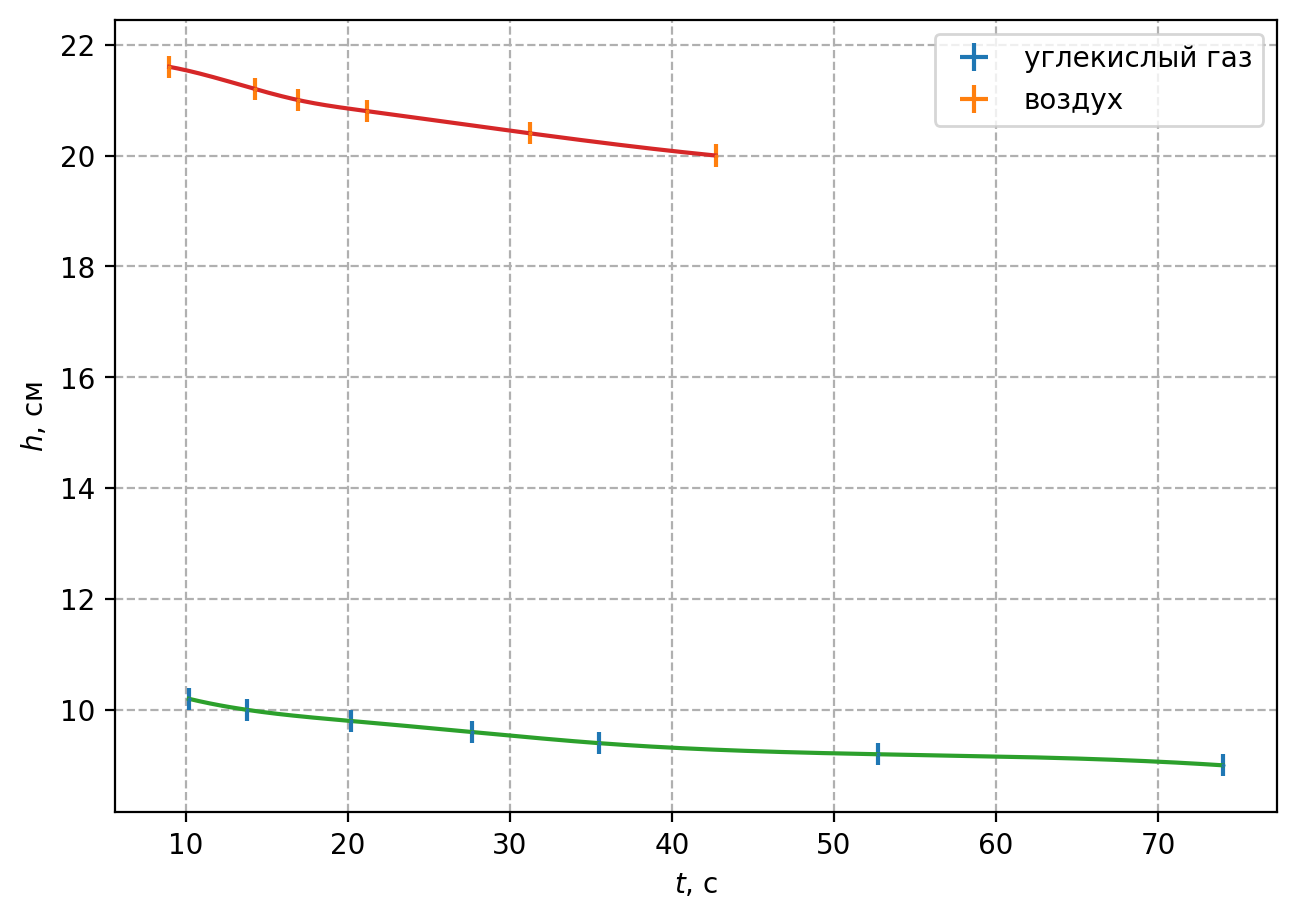

In [88]:
plt.figure(figsize=(30/4,21/4), dpi=200) # размер графика
plt.ylabel("$h$, см") # подписи к осям
plt.xlabel("$t$, с")
plt.grid(True, linestyle="--") # сетка
#plt.axis([0,0.25,0,1.3]) # масштабы осей
plt.errorbar(co_t.t, co_t.h, xerr=0.1,yerr=0.2, label="углекислый газ", ms=0.9/2, fmt='o')
plt.errorbar(air_t.t, air_t.h, xerr=0.1,yerr=0.2, label="воздух", ms=0.9/2, fmt="o")
spl = make_interp_spline (co_t.t, co_t.h, k= 3 )
xnew = np.linspace (co_t.t. min (), co_t.t. max (), 200 ) 
y_smooth = spl (xnew)
#create smooth line chart 
plt.plot (xnew, y_smooth)
spl = make_interp_spline (air_t.t, air_t.h, k= 3 )
xnew = np.linspace (air_t.t. min (), air_t.t. max (), 200 ) 
y_smooth = spl (xnew)
#create smooth line chart 
plt.plot (xnew, y_smooth)
plt.legend() # легенда

In [74]:
print(co.drop(columns=["l1","l2"]).style.to_latex(clines="all;data"))

\begin{tabular}{lrrrrr}
 & t & h1 & h2 & gamma & dg \\
0 & 0.600000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
1 & 0.700000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
2 & 0.700000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
3 & 0.700000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
5 & 1.200000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
6 & 1.600000 & 9.000000 & 1.400000 & 1.184211 & 0.022745 \\
\cline{1-6}
7 & 1.300000 & 9.000000 & 1.600000 & 1.216216 & 0.022978 \\
\cline{1-6}
8 & 0.700000 & 9.000000 & 1.400000 & 1.184211 & 0.022745 \\
\cline{1-6}
9 & 1.900000 & 9.000000 & 1.400000 & 1.184211 & 0.022745 \\
\cline{1-6}
10 & 2.300000 & 9.000000 & 1.400000 & 1.184211 & 0.022745 \\
\cline{1-6}
11 & 2.500000 & 9.000000 & 1.400000 & 1.184211 & 0.022745 \\
\cline{1-6}
12 & 4.400000 & 9.000000 & 1.200000 & 1.153846 & 0.022570 \\
\cline{1-6}
13 & 5.400000 & 9.800000 & 1.600000 & 1.195122 & 0.020956 \\
\cline{1-6}
14 & 